# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [ ]:
#loading dataset
#Calculating duration from the pickup and dropoff datetime in minutes
#removing unwanted columns
#percentage of missing data to the total record of the data
#changing the passenger count and payment type data type to integer as they are present in float
#passenger count and payment type distribution.
#Filtering the data based on payment type and passenger count
#replacing the payment type encoded value 1 and 2 to Card and Cash
#filtering the records for only positive values
#checking for outliers.
#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sts
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the dataset
data=pd.read_csv('/content/yellow_tripdata_2020-09.csv')

In [ ]:
data.head(6)

,Unnamed: 0,Unnamed:_0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,0,1.0,2020-09-01 07:37:32,2020-09-01 07:42:12,1.0,0.90,1.0,N,140,262,1.0,5.5,2.5,0.5,1.75,0.0,0.3,10.55,2.5
1,1,1,2.0,2020-09-01 07:47:57,2020-09-01 07:52:30,1.0,0.87,1.0,N,48,230,1.0,5.5,0.0,0.5,1.20,0.0,0.3,10.00,2.5
2,2,2,2.0,2020-09-01 09:02:30,2020-09-01 09:14:01,1.0,2.33,1.0,N,238,43,2.0,11.0,0.0,0.5,0.00,0.0,0.3,14.30,2.5
3,3,3,1.0,2020-09-01 09:00:28,2020-09-01 09:07:20,1.0,1.30,1.0,N,142,163,1.0,7.0,2.5,0.5,2.00,0.0,0.3,12.30,2.5
4,4,4,2.0,2020-09-01 10:55:27,2020-09-01 11:06:12,1.0,4.93,1.0,N,88,170,1.0,15.5,0.0,0.5,2.50,0.0,0.3,21.30,2.5
5,5,5,2.0,2020-09-01 10:00:25,2020-09-01 10:09:44,1.0,1.61,1.0,N,186,163,1.0,8.0,0.0,0.5,1.70,0.0,0.3,13.00,2.5


# Here's a more detailed breakdown:

VendorID: A code indicating the taxi vendor or service provider.

tpep_pickup_datetime: The date and time when the taxi meter was engaged.

tpep_dropoff_datetime: The date and time when the taxi meter was disengaged.

passenger_count: The number of passengers in the vehicle, as entered by the driver.

trip_distance: The total distance of the trip in miles.

PULocationID: A numeric code representing the pickup location.

DOLocationID: A numeric code representing the dropoff location.

RateCodeID: A numeric code indicating the rate type applied to the trip.

store_and_fwd_flag: A flag indicating whether the trip data was stored in the
vehicle's memory before being sent to the vendor (1 for yes, 0 for no).

payment_type: A numeric code representing the type of payment used for the trip.
1 as cash,2 as card

fare_amount: The fare amount recorded by the meter.

extra: Miscellaneous extra charges.

mta_tax: The MTA tax.

tip_amount: The tip amount.

tolls_amount: The tolls amount.

improvement_surcharge: The improvement surcharge.

total_amount: The total amount charged to the passenger.

congestion_surcharge: The congestion surcharge. According to TLC trip records documentation

# **EDA & FEATURE ENGINEERING:-**

In [ ]:
data.info() #Data set information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             998 non-null    int64  
 1   Unnamed:_0             998 non-null    int64  
 2   VendorID               929 non-null    float64
 3   tpep_pickup_datetime   998 non-null    object 
 4   tpep_dropoff_datetime  998 non-null    object 
 5   passenger_count        929 non-null    float64
 6   trip_distance          998 non-null    float64
 7   RatecodeID             929 non-null    float64
 8   store_and_fwd_flag     929 non-null    object 
 9   PULocationID           998 non-null    int64  
 10  DOLocationID           998 non-null    int64  
 11  payment_type           929 non-null    float64
 12  fare_amount            998 non-null    float64
 13  extra                  998 non-null    float64
 14  mta_tax                998 non-null    float64
 15  tip_am

Pick -up time and Drop -off time both are in objects,need to be chanced into date type:

In [ ]:
#Converting the datatypes:
data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             998 non-null    int64         
 1   Unnamed:_0             998 non-null    int64         
 2   VendorID               929 non-null    float64       
 3   tpep_pickup_datetime   998 non-null    datetime64[ns]
 4   tpep_dropoff_datetime  998 non-null    datetime64[ns]
 5   passenger_count        929 non-null    float64       
 6   trip_distance          998 non-null    float64       
 7   RatecodeID             929 non-null    float64       
 8   store_and_fwd_flag     929 non-null    object        
 9   PULocationID           998 non-null    int64         
 10  DOLocationID           998 non-null    int64         
 11  payment_type           929 non-null    float64       
 12  fare_amount            998 non-null    float64       
 13  extra

In [ ]:
# Adding new columns:
data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration']=data['duration'].dt.total_seconds()/60  # converting into mins..

In [ ]:
#data info
data.head()

,Unnamed: 0,Unnamed:_0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,0,0,1.0,2020-09-01 07:37:32,2020-09-01 07:42:12,1.0,0.90,1.0,N,140,...,1.0,5.5,2.5,0.5,1.75,0.0,0.3,10.55,2.5,4.666667
1,1,1,2.0,2020-09-01 07:47:57,2020-09-01 07:52:30,1.0,0.87,1.0,N,48,...,1.0,5.5,0.0,0.5,1.20,0.0,0.3,10.00,2.5,4.550000
2,2,2,2.0,2020-09-01 09:02:30,2020-09-01 09:14:01,1.0,2.33,1.0,N,238,...,2.0,11.0,0.0,0.5,0.00,0.0,0.3,14.30,2.5,11.516667
3,3,3,1.0,2020-09-01 09:00:28,2020-09-01 09:07:20,1.0,1.30,1.0,N,142,...,1.0,7.0,2.5,0.5,2.00,0.0,0.3,12.30,2.5,6.866667
4,4,4,2.0,2020-09-01 10:55:27,2020-09-01 11:06:12,1.0,4.93,1.0,N,88,...,1.0,15.5,0.0,0.5,2.50,0.0,0.3,21.30,2.5,10.750000


There are so many unnecessary columns,which are not going to help in our analysis,so we need to remove the particular columns for better analysis.

As the problem statement is revolving around the payment type, fare amount, and any other factor influencing the fare amount, we will filter the data to have only passenger count, trip distance, payment type, fare amount and duration of the trip.

In [ ]:
#Removing unwanted columns:
data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [ ]:
data.drop(['Unnamed: 0','Unnamed:_0'],axis=1,inplace=True)

In [ ]:
data.dtypes

,0
passenger_count,float64
trip_distance,float64
payment_type,float64
fare_amount,float64
duration,float64


In [ ]:
data.head(6)

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,0.90,1.0,5.5,4.666667
1,1.0,0.87,1.0,5.5,4.550000
2,1.0,2.33,2.0,11.0,11.516667
3,1.0,1.30,1.0,7.0,6.866667
4,1.0,4.93,1.0,15.5,10.750000
5,1.0,1.61,1.0,8.0,9.316667


In [ ]:
#checking for null values:
data.isnull().sum()

,0
passenger_count,69
trip_distance,0
payment_type,69
fare_amount,0
duration,0


In [ ]:
#checking the null percentage:-
print('The percentage of null values',(69/data.shape[0])*100,'%')

The percentage of null values 6.913827655310621 %


In [ ]:
# as the data has only 6% of data missing, we can simply drop the records with missing values.
data.dropna(inplace = True)

In [ ]:
# changing the passenger count and payment type data type to integer as they are present in float
data['passenger_count'] = data['passenger_count'].astype('int64')
data['payment_type'] = data['payment_type'].astype('int64')

In [ ]:
#checking for duplicate values:-
data.duplicated().sum()

np.int64(1)

In [ ]:
#eliminating the duplicate value:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 928
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_count  928 non-null    int64  
 1   trip_distance    928 non-null    float64
 2   payment_type     928 non-null    int64  
 3   fare_amount      928 non-null    float64
 4   duration         928 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 43.5 KB


In [ ]:
# payment type distribution
data['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1,0.712284
2,0.275862
3,0.008621
4,0.003233


So we dont need the 3rd and 4th type of payments,as they are very less in the data.

In [ ]:
# passenger_count distribution
data['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.750000
2,0.140086
3,0.029095
5,0.026940
4,0.020474
6,0.020474
0,0.012931


Here we dont need the no. of  passengers more than 5

In [ ]:
#FILTERING THE DATA
data=data[(data['passenger_count']>0) & (data['passenger_count']<6) ]
data=data[data['payment_type']<3]

In [ ]:
data.shape

(887, 5)

In [ ]:
# check the statistical measures:
data.describe()

,passenger_count,trip_distance,payment_type,fare_amount,duration
count,887.000000,887.000000,887.000000,887.000000,887.000000
mean,1.379932,2.431172,1.281849,10.657272,19.371289
std,0.870227,2.858909,0.450154,8.501169,102.339336
min,1.000000,0.000000,1.000000,-4.000000,0.000000
25%,1.000000,0.980000,1.000000,6.000000,5.691667
50%,1.000000,1.600000,1.000000,8.500000,9.016667
75%,1.000000,2.700000,2.000000,12.000000,13.800000
max,5.000000,27.330000,2.000000,100.000000,1418.883333


Upon reviewing the provided statistics, it's evident that the minimum values for trip distance, fare amount, and duration are negative, which is unrealistic and invalid for further analysis. Consequently, we will eliminate these negative values from the dataset.

Furthermore, observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.

In [ ]:
# removing negative measures
# filtering the records for only positive values
data = data[data['fare_amount']>0]
data = data[data['trip_distance']>0]
data = data[data['duration']>0]

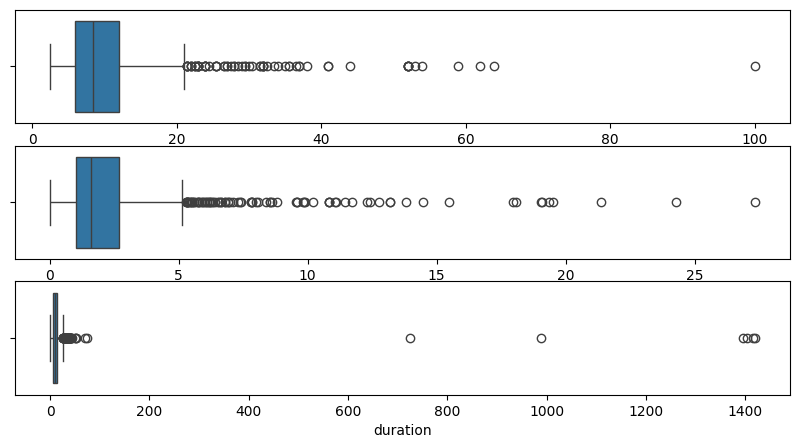

In [ ]:
# checking for outliers:
plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
sns.boxplot(data=data,x='fare_amount')
plt.subplot(3,1,2)
sns.boxplot(data=data,x='trip_distance')
plt.subplot(3,1,3)
sns.boxplot(data=data,x='duration')
plt.show()

In [ ]:
# Removing outliers with the help of IQR
for i in ['fare_amount','trip_distance','duration']:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
  upper=Q3+1.5*IQR
  lower=Q1-1.5*IQR
  data=data[(data[i]>=lower) & (data[i]<=upper)]

In [ ]:
data.shape

(752, 5)

In [ ]:
data['payment_type'].replace([1,2])

,payment_type
0,1
1,1
2,1
3,1
5,1
...,...
924,1
925,1
926,1
927,1


In [ ]:
data['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [ ]:
data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,0.90,Card,5.5,4.666667
1,1,0.87,Card,5.5,4.550000
2,1,2.33,Cash,11.0,11.516667
3,1,1.30,Card,7.0,6.866667
5,1,1.61,Card,8.0,9.316667


# **CHECKING THE DISTRIBUTION OF THE DATA:-**

We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

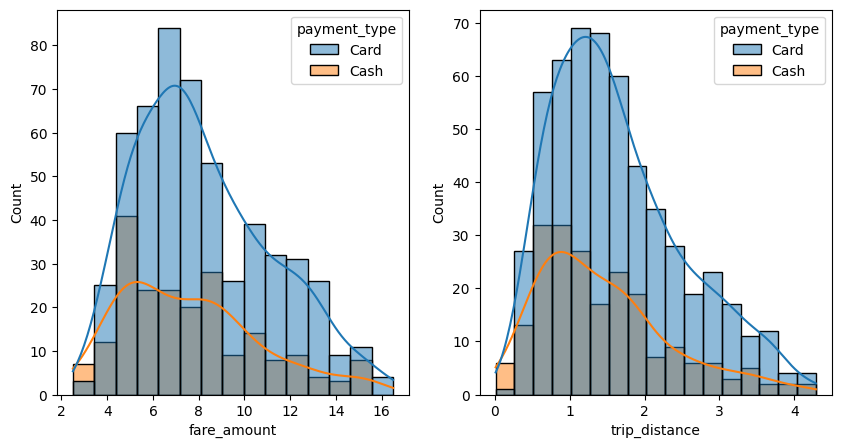

In [ ]:
# CHECKING THE DISTRIBUTION OF DATA
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=data,x='fare_amount',hue='payment_type',kde=True,color = ['#FA643F','#FFBCAB'])
plt.subplot(1,2,2)
sns.histplot(data=data,x='trip_distance',hue='payment_type',kde=True,color = ['#FA643F','#FFBCAB'])
plt.show()


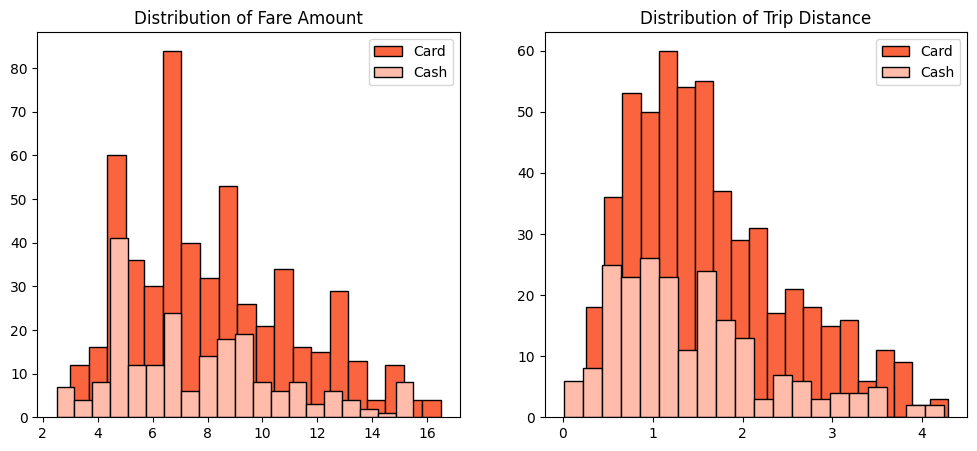

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            8.222736  2.950804       1.64000  0.872649
Cash            7.613744  3.059933       1.44327  0.877703

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(data[data['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(data[data['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(data[data['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#FA643F',label = 'Card')
plt.hist(data[data['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFBCAB',label = 'Cash')
plt.legend()
plt.show()

# calculating the mean and standard deviation group by on payment type
data.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

In [ ]:
data.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            8.222736  2.950804       1.64000  0.872649
Cash            7.613744  3.059933       1.44327  0.877703

Now, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart. This graphical depiction will offer a clear and intuitive understanding of the distribution between the two payment methods chosen by passengers.

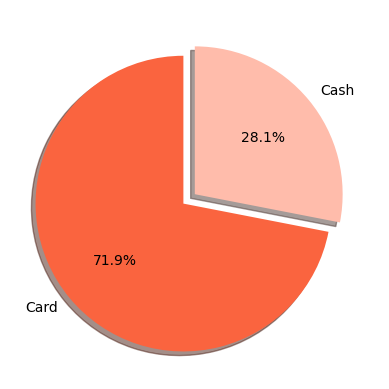

In [ ]:
plt.pie(data['payment_type'].value_counts(normalize=True),labels=data['payment_type'].value_counts().index,shadow=True,startangle=90,autopct='%1.1f%%',
            explode=[0.1,0],colors = ['#FA643F','#FFBCAB'])
plt.show()

Subsequently, we aim to conduct an analysis of the payment types in relation to the passenger count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.

To facilitate this examination, we have employed a visualization technique known as a stacked bar plot. This method is particularly advantageous for comparing the percentage distribution of each passenger count based on the payment method selected. Through this graphical representation, we can gain insights into potential variations in payment preferences across different passenger counts.

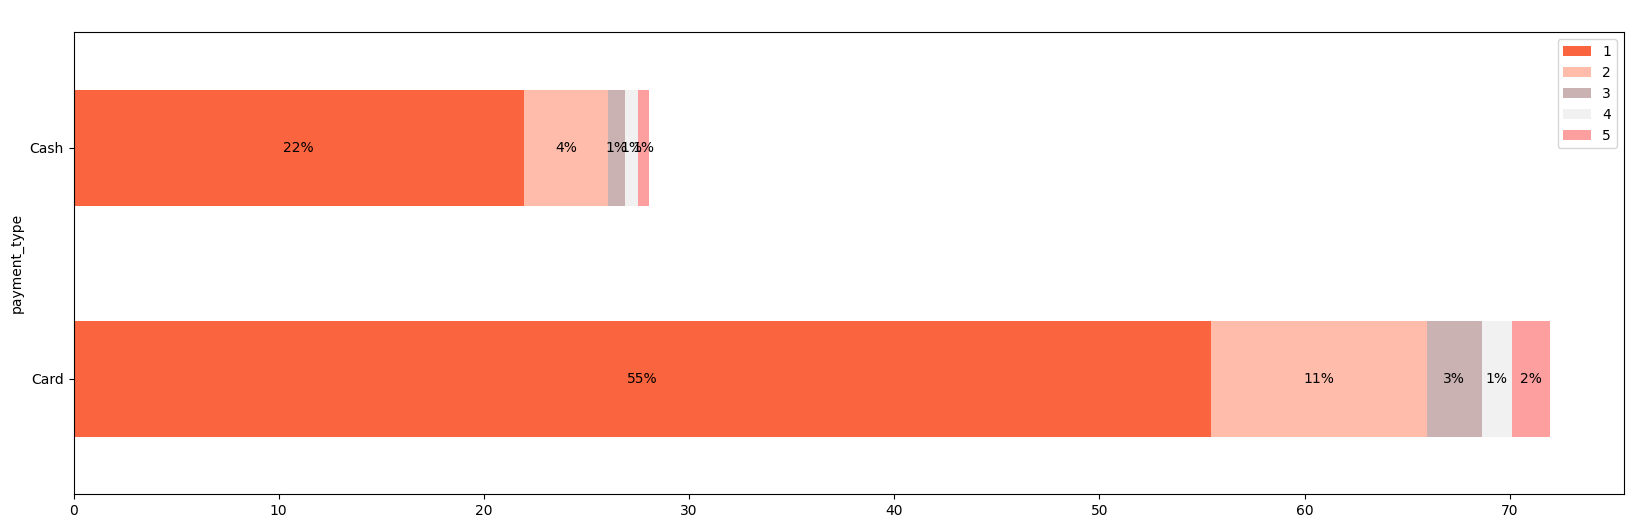

In [ ]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# renaming the passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'] )

# Add percentage text
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# **HYPOTHESIS TESTING:**

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.

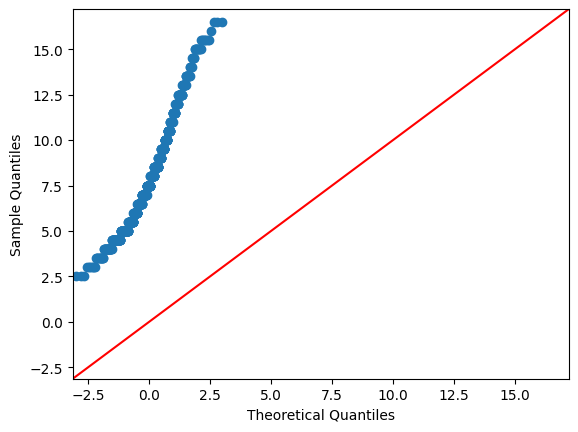

In [ ]:
fig=sm.qqplot(data['fare_amount'],line='45')
plt.show()

The data values clearly do not follow the red 45-degree line, which is an indication that they do not follow a normal distribution. So, z distribution will not be good for this. That's why we will use T test.

Given that the T-test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analyses of taxi trip data.


In the analysis of NYC Yellow Taxi Trip Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets, the T-test offers a more appropriate and flexible method for comparing means between two groups (e.g., fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

**Null hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash



In [ ]:
data.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,0.90,Card,5.5,4.666667
1,1,0.87,Card,5.5,4.550000
2,1,2.33,Cash,11.0,11.516667
3,1,1.30,Card,7.0,6.866667
5,1,1.61,Card,8.0,9.316667


In [ ]:
# sample 1
credit_card = data[data['payment_type'] == 'Card']['fare_amount']
# sample 2
cash = data[data['payment_type'] == 'Cash']['fare_amount']

# T-test:
t_statistic,p_value=sts.ttest_ind(credit_card,cash,equal_var=False)
print('T-statistic:',t_statistic)
print('P-value:',p_value)

#condition checking:
if p_value<0.5:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

T-statistic: 2.4765164150234082
P-value: 0.013712334201505107
Reject the null hypothesis


Means there is significant difference between customers who use cash and customers how use card.
Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

# **CORRELATION ANALYSIS:-**

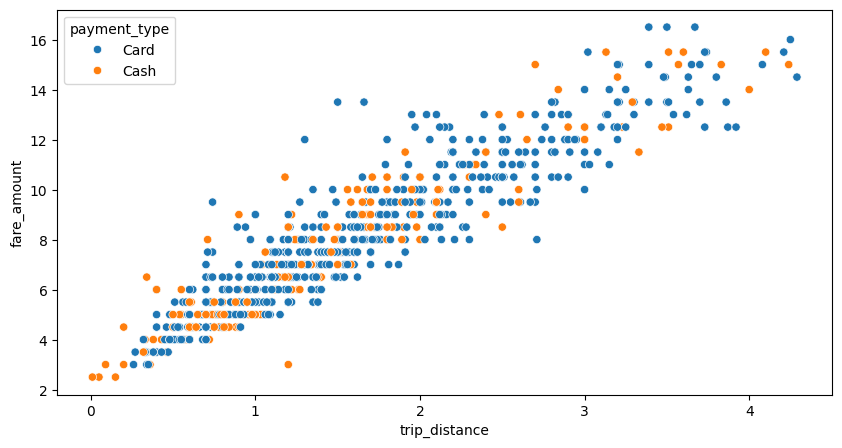

In [ ]:
# correlation analysis between trip distance and fare ammount
plt.figure(figsize=(10,5))
sns.scatterplot(data=data,x='trip_distance',y='fare_amount',hue='payment_type')
plt.show()

As usual with dustance the fare ammount is increased.Here we can also observe that the frequency of paying with card is more.